# Content:
1. [Definitions](#1.-Definitions)
2. [The root finding problem](#2.-The-root-finding-problem)
3. [Fixed point iteration](#3.-Fixed-point-iteration)
>3.1 [The cobweb diagram](#3.1-The-cobweb-diagram)   
>3.2 [Fixed point iteration theorem](#3.2-Fixed-point-iteration-theorem)   
>3.3 [The code](#3.3-The-code)
4. [Bisection method](#4.-Bisection-method)

# 1. Definitions

![board%20work%20-32.jpg](../boardwork/board%20work%20-32.jpg)

[Weierstrass function](https://en.wikipedia.org/wiki/Weierstrass_function) is a peculiar function. It is continuous on the real number line but not differentiable anywhere.

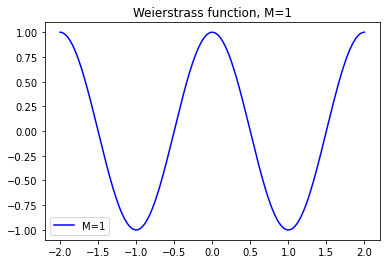

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def weierstrass(a,b,M,x):
    val = 0.0
    for n in range(0,M):
        val = val + a**n * np.cos(b**n*np.pi*x)
    return val

x = np.linspace(-2,2,1000) # 1000 points between -2 and +2
a=0.5
b=3.0

N=x.size
y=np.zeros(N)

M=1
for i in range(N):
    y[i]=weierstrass(a,b,M,x[i])
plt.plot(x, y, 'b-', label='M=1')

plt.title('Weierstrass function, M=1')
plt.legend()
plt.show()

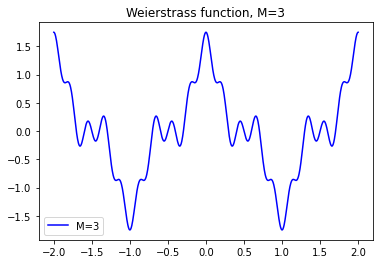

In [2]:
M=3
for i in range(N):
    y[i]=weierstrass(a,b,M,x[i])
plt.plot(x, y, 'b-', label='M=3')

plt.title('Weierstrass function, M=3')
plt.legend()
plt.show()

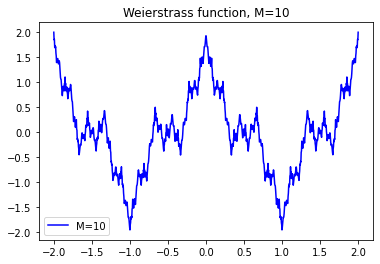

In [3]:
M=10
for i in range(N):
    y[i]=weierstrass(a,b,M,x[i])
plt.plot(x, y, 'b-', label='M=10')

plt.title('Weierstrass function, M=10')
plt.legend()
plt.show()

---
Homework-16: Find examples for polynomial, rational, trigonometric, exponential and logarithmic functions that are in $C^\infty[{\bf R}],~{\rm where}~{\bf R}$ is the real number line.
    
---

## 2. The root-finding problem

![board%20work%20-33.jpg](../boardwork/board%20work%20-33.jpg)

## 3. Fixed point iteration 

![board%20work%20-34.jpg](../boardwork/board%20work%20-34.jpg)

In [4]:
import numpy as np

def f(x):
    val=x-np.sqrt(10.0/x)
    return val

def g(x):
    val=np.sqrt(10.0/x)
    return val

x=1  # initial guess, x0

dx=x

i=0
while dx > 1e-3:
    dx=np.abs(x-g(x))
    print('Iteration: ',i,' x:',x,' g(x):',g(x),' f(x): ', f(x))
    x=g(x)
    i=i+1

print('Exact root is  x:',np.power(10.0,1.0/3.0))

Iteration:  0  x: 1  g(x): 3.1622776601683795  f(x):  -2.1622776601683795
Iteration:  1  x: 3.1622776601683795  g(x): 1.7782794100389228  f(x):  1.3839982501294568
Iteration:  2  x: 1.7782794100389228  g(x): 2.3713737056616555  f(x):  -0.5930942956227327
Iteration:  3  x: 2.3713737056616555  g(x): 2.053525026457146  f(x):  0.31784867920450965
Iteration:  4  x: 2.053525026457146  g(x): 2.20673406908459  f(x):  -0.15320904262744417
Iteration:  5  x: 2.20673406908459  g(x): 2.1287516617963727  f(x):  0.07798240728821737
Iteration:  6  x: 2.1287516617963727  g(x): 2.1673921695684175  f(x):  -0.03864050777204486
Iteration:  7  x: 2.1673921695684175  g(x): 2.1479850285170086  f(x):  0.01940714105140895
Iteration:  8  x: 2.1479850285170086  g(x): 2.157666779453667  f(x):  -0.00968175093665824
Iteration:  9  x: 2.157666779453667  g(x): 2.152820461347157  f(x):  0.004846318106509706
Iteration:  10  x: 2.152820461347157  g(x): 2.155242258210635  f(x):  -0.0024217968634778764
Iteration:  11  x: 2

Here is another elegant way to print the output 

In [5]:
x=1.0

for i in range(0,15):
    gx=g(x)
    fx=f(x)
    fstring=(f'''Iteration={i:5d} x={x:10.4f} g(x)={gx:10.4f} f(x)={np.abs(fx):10.4f}''') # using f-string
    print(fstring)
    x=g(x)

out=(f'''Exact root is   x={np.power(10.0,1.0/3.0):10.4f}''')
print(out)

#other way for formatted print
#mynumber=3.14
#print('{:10.8f}'.format(mynumber))

Iteration=    0 x=    1.0000 g(x)=    3.1623 f(x)=    2.1623
Iteration=    1 x=    3.1623 g(x)=    1.7783 f(x)=    1.3840
Iteration=    2 x=    1.7783 g(x)=    2.3714 f(x)=    0.5931
Iteration=    3 x=    2.3714 g(x)=    2.0535 f(x)=    0.3178
Iteration=    4 x=    2.0535 g(x)=    2.2067 f(x)=    0.1532
Iteration=    5 x=    2.2067 g(x)=    2.1288 f(x)=    0.0780
Iteration=    6 x=    2.1288 g(x)=    2.1674 f(x)=    0.0386
Iteration=    7 x=    2.1674 g(x)=    2.1480 f(x)=    0.0194
Iteration=    8 x=    2.1480 g(x)=    2.1577 f(x)=    0.0097
Iteration=    9 x=    2.1577 g(x)=    2.1528 f(x)=    0.0048
Iteration=   10 x=    2.1528 g(x)=    2.1552 f(x)=    0.0024
Iteration=   11 x=    2.1552 g(x)=    2.1540 f(x)=    0.0012
Iteration=   12 x=    2.1540 g(x)=    2.1546 f(x)=    0.0006
Iteration=   13 x=    2.1546 g(x)=    2.1543 f(x)=    0.0003
Iteration=   14 x=    2.1543 g(x)=    2.1545 f(x)=    0.0002
Exact root is   x=    2.1544


### 3.1 The cobweb diagram 

![board%20work%20-35.jpg](../boardwork/board%20work%20-35.jpg)
![board%20work%20-36.jpg](../boardwork/board%20work%20-36.jpg)
![board%20work%20-37.jpg](../boardwork/board%20work%20-37.jpg)

In [6]:
def g_fn(x):
    val=np.sqrt(10.0/x)
    return val

N=15
x=np.zeros(N,float)
g=np.zeros(N,float)

x0=1.0   # initial guess

Ni=10
for i in range(0,Ni):
    x[i]=x0
    g[i]=g_fn(x0)
    x0=g[i]  
    
#print(x,g)

<ipython-input-6-348e80d82643>:2: RuntimeWarning: divide by zero encountered in double_scalars
  val=np.sqrt(10.0/x)


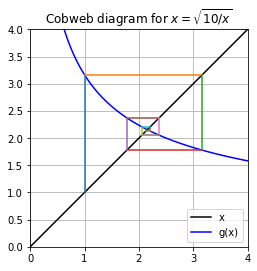

In [7]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()                        # comment if square plot is not needed
ax = fig.add_subplot(111)                 # comment if square plot is not needed

plt.xlim(0, 4)
plt.ylim(0, 4)

x_grids = np.linspace(0,4,100) 
N=x_grids.size
g_grids=np.zeros(N)

for i in range(N):
    g_grids[i]=g_fn(x_grids[i])

plt.plot(x_grids,x_grids,'k-',label='x')
plt.plot(x_grids,g_grids,'b-',label='g(x)')

xval=[x[0],x[0]]
gval=[x[0],g[0]]
plt.plot(xval,gval)

plt.grid()

for i in range(0,6):

    # horizontal line, same y-value
    xval=[x[i],g[i]]
    gval=[g[i],g[i]]
    plt.plot(xval,gval)

    # vertical line, same x-value      
    xval=[g[i],x[i+1]]
    gval=[g[i],g[i+1]]
    plt.plot(xval,gval)

ax.set_aspect('equal', adjustable='box')  # comment if square plot is not needed

plt.title('Cobweb diagram for $x=\sqrt{10/x}$')
plt.legend()
plt.show()

### Let's try another problem: $x - 1/x^2 = 0;~g(x)=1/x^2;~x_0 = 0.1$

In [8]:
import numpy as np

def g_fn(x):
    val=1.0/x**2
    return val

def f_fn(x):
    val=x-1.0/x**2
    return val

x=0.1

for i in range(0,4):
    gx=g_fn(x)
    fx=f_fn(x)
    fstring=(f'''Iteration={i:5d} x={x:10.4f} g(x)={gx:10.4f} f(x)={np.abs(fx):10.4f}''') # using f-string
    print(fstring)
    x=g_fn(x)

Iteration=    0 x=    0.1000 g(x)=  100.0000 f(x)=   99.9000
Iteration=    1 x=  100.0000 g(x)=    0.0001 f(x)=   99.9999
Iteration=    2 x=    0.0001 g(x)=100000000.0000 f(x)=99999999.9999
Iteration=    3 x=100000000.0000 g(x)=    0.0000 f(x)=100000000.0000


Diverges! 

### 3.2 Fixed point iteration theorem

![board%20work%20-38.jpg](../boardwork/board%20work%20-38.jpg)
![board%20work%20-39.jpg](../boardwork/board%20work%20-39.jpg)
![board%20work%20-40.jpg](../boardwork/board%20work%20-40.jpg)
![board%20work%20-41.jpg](../boardwork/board%20work%20-41.jpg)
![board%20work%20-42.jpg](../boardwork/board%20work%20-42.jpg)
![board%20work%20-43.jpg](../boardwork/board%20work%20-43.jpg)

### 3.3 The code

In [9]:
import numpy as np

# fn is the g(x) in x = g(x) that we want to solve
# x is the initial guess, x0
# xthresh is convergence thershold
# maxeval - maximum number of evaluation of fn
# iprint control printing, iprint = 1 for extra output
def fixedpoint(fn, x, xthresh, maxeval, iprint):
    
    if iprint == 1:
        print('#iter          x          g(x)           dx')

    ieval=0
    
    g=fn(x)
    ieval=ieval+1
    
    dx=np.abs(x-g)

    iiter=0 
    while dx > xthresh:
        g=fn(x)
        ieval=ieval+1
    
        dx=np.abs(x-g)
    
        if iprint == 1:
            print('{:5d}{:15.6e}{:15.6e}{:15.6e}'.format(iiter,x, g, dx))

        if ieval >= maxeval:
            print('Exiting fixed-point iteration, maximum function evaluations reached')
            break
        
        x=g
        iiter=iiter+1

    return x    
    print('Exiting fixed-point iteration, convergence reached')    

In [10]:
def fn_g(x):
    val=np.sqrt(10.0/x)
    return val

In [11]:
x0 = 1.0
xthresh = 1E-5
maxeval = 100 
iprint=1
x = fixedpoint(fn_g, x0, xthresh, maxeval,iprint)
print('The solution is: ',x)

#iter          x          g(x)           dx
    0   1.000000e+00   3.162278e+00   2.162278e+00
    1   3.162278e+00   1.778279e+00   1.383998e+00
    2   1.778279e+00   2.371374e+00   5.930943e-01
    3   2.371374e+00   2.053525e+00   3.178487e-01
    4   2.053525e+00   2.206734e+00   1.532090e-01
    5   2.206734e+00   2.128752e+00   7.798241e-02
    6   2.128752e+00   2.167392e+00   3.864051e-02
    7   2.167392e+00   2.147985e+00   1.940714e-02
    8   2.147985e+00   2.157667e+00   9.681751e-03
    9   2.157667e+00   2.152820e+00   4.846318e-03
   10   2.152820e+00   2.155242e+00   2.421797e-03
   11   2.155242e+00   2.154031e+00   1.211239e-03
   12   2.154031e+00   2.154637e+00   6.055343e-04
   13   2.154637e+00   2.154334e+00   3.027884e-04
   14   2.154334e+00   2.154485e+00   1.513889e-04
   15   2.154485e+00   2.154409e+00   7.569577e-05
   16   2.154409e+00   2.154447e+00   3.784755e-05
   17   2.154447e+00   2.154428e+00   1.892386e-05
   18   2.154428e+00   2.154438e+00   

### Let's try another problem: $\exp(-x) + x/5 - 1 = 0$

Let's look at the graphical solution by plotting the function $f(x)$ and see where it takes the value zero.

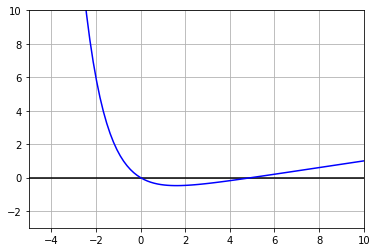

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    val=np.exp(-x)+x/5.0-1
    return val

xmin=-5.0
xmax=10.0
plt.xlim(xmin, xmax)

plt.ylim(-3, 10)

x = np.linspace(xmin,xmax,100) 
N=x_grids.size
y=np.zeros(N)

for i in range(N):
    y[i]=f(x[i])

plt.plot(x,x*0,'k-')
plt.plot(x,y,'b-')
plt.grid()
plt.show()

There are two roots for this equation. One at 0.0 and another near 5.0.

There are two ways of rearranging the equation to apply the fixed-point iteration $x_{n+1}=g(x_n)$.
* Option-1: $g_1(x)=5\left[ 1- \exp(-x) \right]$   
* Option-2: $g_2(x)=-\log\left[ 1 - x/5 \right]$

In [13]:
def g1(x):
    val=5 * ( 1 - np.exp(-x) )
    return val

x0 = 2     # somewhere in between both the solutions
maxeval = 20
xthresh = 0.0001
iprint=1
x = fixedpoint(g1, x0, xthresh, maxeval,iprint)
print('The solution is: ',x)

#iter          x          g(x)           dx
    0   2.000000e+00   4.323324e+00   2.323324e+00
    1   4.323324e+00   4.933721e+00   6.103976e-01
    2   4.933721e+00   4.964002e+00   3.028046e-02
    3   4.964002e+00   4.965075e+00   1.073707e-03
    4   4.965075e+00   4.965113e+00   3.747867e-05
The solution is:  4.965112876983948


In [14]:
def g2(x):
    val=-np.log(1-x/5.0)
    return val

x0 = 2.0   # somewhere in between both the solutions
maxeval = 10
xthresh = 0.0001
iprint=1
x = fixedpoint(g2, x0, xthresh, maxeval,iprint)
print('The solution is: ',x)

#iter          x          g(x)           dx
    0   2.000000e+00   5.108256e-01   1.489174e+00
    1   5.108256e-01   1.077691e-01   4.030565e-01
    2   1.077691e-01   2.178950e-02   8.597961e-02
    3   2.178950e-02   4.367423e-03   1.742207e-02
    4   4.367423e-03   8.738663e-04   3.493557e-03
    5   8.738663e-04   1.747885e-04   6.990778e-04
    6   1.747885e-04   3.495832e-05   1.398302e-04
    7   3.495832e-05   6.991688e-06   2.796663e-05
The solution is:  6.991687951052522e-06


---
Homework-17: $For~the~above~example,~using~the~fixed~point~convergence~relation~explain~why~using~g_1(x)~results~in~the~solution~x^*=4.965~while~g_2(x)~results~in~x^*=0.0.~In~both~cases,~use~x_0=2.0~as~the~initial~guess.$
    
---

## 4. Bisection method

![board%20work%20-44.jpg](../boardwork/board%20work%20-44.jpg)
![board%20work%20-45.jpg](../boardwork/board%20work%20-45.jpg)
![board%20work%20-46.jpg](../boardwork/board%20work%20-46.jpg)

In [42]:
import numpy as np

def bisection(fn, a0, b0, xthresh, maxeval, iprint):
    
    if iprint == 1:
        print('#iter     a              b              x              dx')
  
    ieval=0
    iiter=1
    
    a=a0
    b=b0
    
    dx = abs(a-b)
    
    while dx > xthresh or iiter < 10:
        
        x  = (a+b)/2.0
                
        dx = abs(a-b)            
                
        fx = fn(x)
        fb = fn(b)
        
        if (fb < xthresh): # handle an exception
            print('The upper limit seems to be a root. Stopping program.')
            x=b
            break
            
        if iprint == 1:
            print('{:5d}{:15.6e}{:15.6e}{:15.6e}{:15.6e}{:15.6e}{:15.6e}'.format(iiter, a, b, x, dx,fx,fb))
            
        if fx*fb > 0:
            b = x
        else:
            a = x           
        
        ieval=ieval+2
        if ieval >= maxeval:
            print('Exiting fixed-point iteration, maximum function evaluations reached')
            break
        
        iiter=iiter+1

    print('Exiting fixed-point iteration, convergence reached')  
    return x  

In [43]:
def fn_f(x):
    val=np.exp(-x)+x/5.0-1
    return val

In [47]:
a = 4.0
b = 6.0
maxeval = 100
xthresh = 0.0001
iprint=1
x = bisection(fn_f, a, b, xthresh, maxeval,iprint)
print('The solution is: ',x)

#iter     a              b              x              dx
    1   4.000000e+00   6.000000e+00   5.000000e+00   2.000000e+00   1.600000e+01   2.500000e+01
    2   4.000000e+00   5.000000e+00   4.500000e+00   1.000000e+00   1.225000e+01   1.600000e+01
    3   4.000000e+00   4.500000e+00   4.250000e+00   5.000000e-01   1.056250e+01   1.225000e+01
    4   4.000000e+00   4.250000e+00   4.125000e+00   2.500000e-01   9.765625e+00   1.056250e+01
    5   4.000000e+00   4.125000e+00   4.062500e+00   1.250000e-01   9.378906e+00   9.765625e+00
    6   4.000000e+00   4.062500e+00   4.031250e+00   6.250000e-02   9.188477e+00   9.378906e+00
    7   4.000000e+00   4.031250e+00   4.015625e+00   3.125000e-02   9.093994e+00   9.188477e+00
    8   4.000000e+00   4.015625e+00   4.007812e+00   1.562500e-02   9.046936e+00   9.093994e+00
    9   4.000000e+00   4.007812e+00   4.003906e+00   7.812500e-03   9.023453e+00   9.046936e+00
   10   4.000000e+00   4.003906e+00   4.001953e+00   3.906250e-03   9.011723e+

In [45]:
def fn_f(x):
    val=(x-1)**2
    return val

In [46]:
a = -10
b = 1
maxeval = 100
xthresh = 0.0001
iprint=1
x = bisection(fn_f, a, b, xthresh, maxeval,iprint)
print('The solution is: ',x)

#iter     a              b              x              dx
The upper limit seems to be a root. Stopping program.
Exiting fixed-point iteration, convergence reached
The solution is:  1
